In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a= pd.read_csv('ccdata.csv')

In [3]:
a.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#2546 884,13-Oct-20,23,1,0,17.0,1,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays,0
1,#2546 895,14-Oct-20,21,0,0,28.0,1,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS,0
2,#2546 903,13-Oct-20,19,0,0,8.0,1,Subscription,United Kingdom,United Kingdom,United Kingdom,M,32,Barclays,0
3,#2546 906,14-Oct-20,9,1,1,186.0,0,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,65,Barclays,0
4,#2546 920,13-Oct-20,22,0,1,86.0,1,Children,United Kingdom,United Kingdom,United Kingdom,F,61,Monzo,0


In [4]:
# As we don't need Transaction ID, Date, time, Shipping Address and residence so we drop this features
b=a.drop(['Transaction ID','Date','Time','Shipping Address','Country of Residence'],axis=1)

In [5]:
# Now running the new file.
b.head()

,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Gender,Age,Bank,Fraud
0,1,0,17.0,1,Restaurant,United Kingdom,F,36,Barclays,0
1,0,0,28.0,1,Gaming,United Kingdom,M,41,RBS,0
2,0,0,8.0,1,Subscription,United Kingdom,M,32,Barclays,0
3,1,1,186.0,0,Entertainment,United Kingdom,F,65,Barclays,0
4,0,1,86.0,1,Children,United Kingdom,F,61,Monzo,0


In [6]:
# Describing
b.describe()

,Type of Card,Entry Mode,Amount,Type of Transaction,Age,Fraud
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000
mean,0.461880,0.50163,112.566480,0.99968,53.081630,0.071900
std,0.498547,0.50000,123.428493,0.81559,18.742452,0.258324
min,0.000000,0.00000,5.000000,0.00000,21.000000,0.000000
25%,0.000000,0.00000,17.000000,0.00000,37.000000,0.000000
50%,0.000000,1.00000,30.000000,1.00000,53.000000,0.000000
75%,1.000000,1.00000,208.000000,2.00000,69.000000,0.000000
max,1.000000,1.00000,400.000000,2.00000,85.000000,1.000000


In [7]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Type of Card            100000 non-null  int64  
 1   Entry Mode              100000 non-null  int64  
 2   Amount                  100000 non-null  float64
 3   Type of Transaction     100000 non-null  int64  
 4   Merchant Group          100000 non-null  object 
 5   Country of Transaction  100000 non-null  object 
 6   Gender                  100000 non-null  object 
 7   Age                     100000 non-null  int64  
 8   Bank                    100000 non-null  object 
 9   Fraud                   100000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 7.6+ MB


In [8]:
# Checking Null values
b.isnull().sum()

Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [9]:
# Defining Pie Chart
def pie_chart(x_yes,x_no,y_yes,y_no,x_label,y_label):
    # Showing 2 pie charts along side
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
    
    
    # Create a pieplot for x
    
    values=[x_yes,x_no]
    labels = 'Number of '+'{}'.format(x_label)+'\n Frauds ('+str(x_yes)+')', 'Number of '+'{}'.format(x_label)+'\n Loyal customer ('+ str(x_no)+')'
    explode = (0,0.1) # Only Not Approved will display
    colors = ['#7FFF00','#FF4040']
    
    # Creating first piechart
    ax1.pie(values,explode=explode, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size':'medium', 'color' : 'black'})
    ax1.axis('equal')# Equal aspect ratio to have proper circle
    ax1.set_title('Distribution of '+ '{} '.format(x_label) +'\n Frauds', fontsize=15, color='black', weight='bold', pad=20)
    ax1.legend(labels, loc='best', prop={'size': 8})
    ax1.axis('equal')
    
    # Creating for Y Variable
    values=[y_yes,y_no]
    lables='Number of '+'{}'.format(y_label)+'\n Frauds ('+str(y_yes)+')','Number of '+'{}'.format(y_label)+'\n Loyal Customer ('+str(y_no)+')'
    explode = (0, 0.1) # only explode the 2nd slice "No Approved"
    colors = ['#7FFF00','#FF4040']

    ax2.pie(values, explode=explode, colors=colors,
          shadow=True, startangle=90, autopct='%1.1f%%', textprops={'size':'medium', 'color' : 'black'})
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.set_title('Distribution of '+ '{} '.format(y_label) +'\n Frauds', fontsize=15, color='black', weight='bold', pad=20)
    ax2.legend(labels, loc='best', prop={'size': 8})
    ax2.axis('equal')

    plt.show()

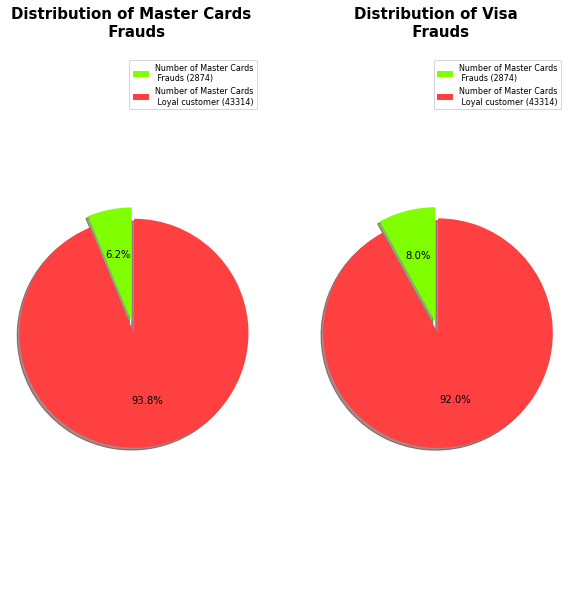

In [10]:
# Pie Chart Based on Type of Cards
x_yes= sum(1 for i,j in zip(b['Type of Card'],b['Fraud'])if i==1 and j==1)
x_no= sum(1 for i,j in zip(b['Type of Card'],b['Fraud'])if i==1 and j==0)
y_yes= sum(1 for i,j in zip(b['Type of Card'],b['Fraud'])if i==0 and j==1)
y_no= sum(1 for i,j in zip(b['Type of Card'],b['Fraud'])if i==0 and j==0)
x_label="Master Cards"
y_label="Visa"
pie_chart(x_yes,x_no,y_yes,y_no,x_label,y_label)

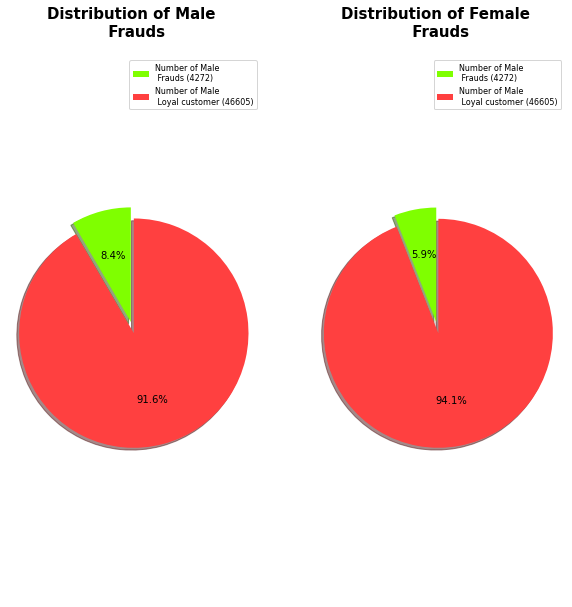

In [11]:
# Based on Gender Fraud
x_yes= sum(1 for i,j in zip(b['Gender'],b['Fraud'])if i=='M' and j==1)
x_no= sum(1 for i,j in zip(b['Gender'],b['Fraud'])if i=='M' and j==0)
y_yes= sum(1 for i,j in zip(b['Gender'],b['Fraud'])if i=='F' and j==1)
y_no= sum(1 for i,j in zip(b['Gender'],b['Fraud'])if i=='F' and j==0)
x_label="Male"
y_label="Female"
pie_chart(x_yes,x_no,y_yes,y_no,x_label,y_label)

In [12]:
# Bar Graph representation
# Defining functions to plot different views
def hist_mean_median(x,f_name):
    plt.rcParams["figure.figsize"]=(8,6)
    result=plt.hist(x,bins='auto',color='#b887ed',alpha=0.9)
    plt.axvline(x.mean(),color='r',linestyle='--', linewidth=1, label=x.mean)
    plt.axvline(x.median(),color='g',linestyle='-',linewidth=1,label=x.median)
    plt.title('{}'.format(f_name)+' Distribution with Median (solid)\n and Mean (dashed) Lines')
    plt.xlabel('{}'.format(f_name))
    plt.ylabel("Frequency")
    plt.text(x.mean()*1.1,23,'Mean of Applicant Income : {:.0f}'.format(x.mean()))
    plt.text(x.median()*1.1,10,'Median Applicant Income : {:.0f}'.format(x.median()))
    plt.show()

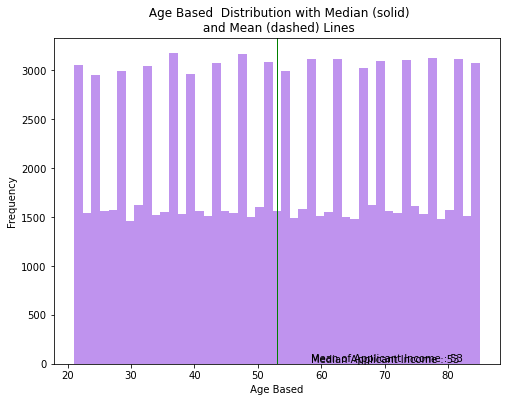

In [13]:
hist_mean_median(b['Age'],' Age Based ')

In [14]:
# Based on Type of Transaction taking out the percentage
tap_fraud = sum(1 for i, j in zip(b['Entry Mode'], b["Fraud"]) if i == 0 and j == 1)
tap_not_fraud = sum(1 for i, j in zip(b['Entry Mode'], b["Fraud"]) if i == 0 and j == 0)
PIN_fraud = sum(1 for i, j in zip(b['Entry Mode'], b["Fraud"]) if i == 1 and j == 1)
PIN_not_fraud = sum(1 for i, j in zip(b['Entry Mode'], b["Fraud"]) if i == 1 and j == 0)


tap_fraud_rate = tap_fraud/(tap_fraud+tap_not_fraud)*100
PIN_fraud_rate = PIN_fraud/(PIN_fraud+PIN_not_fraud)*100


print("Percentage of Fraud in Tap is "+str("%.0f%%"%tap_fraud_rate))
print("Percentage of Fraud in PIN is "+str("%.0f%%"%PIN_fraud_rate))


Percentage of Fraud in Tap is 11%
Percentage of Fraud in PIN is 3%


In [15]:
from sklearn.preprocessing import LabelEncoder
y=(LabelEncoder().fit_transform(b['Fraud'].astype('str')))

In [16]:
# Defining Independent Variabale 
x=b[['Type of Card','Entry Mode','Type of Transaction','Age']]

## Converting data into string
Type of Cards = Visa-0,Mastercard-1
 Entry Mode = Tap-0,PIN-1
Type of Transaction- ATM-0,Online-1,POS-2

In [17]:
# Split data into train test method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
# Checking the Train data 
X_train

,Type of Card,Entry Mode,Type of Transaction,Age
10382,0,0,0,50
73171,1,1,1,42
30938,1,0,0,43
99310,1,1,2,35
58959,0,1,2,30
...,...,...,...,...
21243,0,0,1,80
45891,0,1,2,53
42613,0,1,1,76
43567,1,1,1,57


In [20]:
# Checking the test data based on training
X_test

,Type of Card,Entry Mode,Type of Transaction,Age
3582,0,1,1,36
60498,1,1,2,61
53227,0,1,2,62
21333,1,0,2,32
3885,0,0,2,54
...,...,...,...,...
60116,0,0,2,27
2415,1,1,0,84
43763,0,0,2,65
71345,0,1,2,77


In [21]:
regressionmodel= LogisticRegression()
regressionmodel.fit(X_train,y_train)

LogisticRegression()

In [22]:
regressionmodel.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
# Predicting the Score based on our train test
regressionmodel.score(X_test,y_test)

0.92785

In [24]:
# Checking out probability of Fraud
regressionmodel.predict_proba(X_test)

array([[0.96338502, 0.03661498],
       [0.96810598, 0.03189402],
       [0.95872602, 0.04127398],
       ...,
       [0.86199812, 0.13800188],
       [0.95912869, 0.04087131],
       [0.87579521, 0.12420479]])

In [25]:
# Converting price into integers
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Type of Card            100000 non-null  int64  
 1   Entry Mode              100000 non-null  int64  
 2   Amount                  100000 non-null  float64
 3   Type of Transaction     100000 non-null  int64  
 4   Merchant Group          100000 non-null  object 
 5   Country of Transaction  100000 non-null  object 
 6   Gender                  100000 non-null  object 
 7   Age                     100000 non-null  int64  
 8   Bank                    100000 non-null  object 
 9   Fraud                   100000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 7.6+ MB


In [26]:
b['Amount']=pd.to_numeric(b['Amount'],errors='coerce')

In [27]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Type of Card            100000 non-null  int64  
 1   Entry Mode              100000 non-null  int64  
 2   Amount                  100000 non-null  float64
 3   Type of Transaction     100000 non-null  int64  
 4   Merchant Group          100000 non-null  object 
 5   Country of Transaction  100000 non-null  object 
 6   Gender                  100000 non-null  object 
 7   Age                     100000 non-null  int64  
 8   Bank                    100000 non-null  object 
 9   Fraud                   100000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 7.6+ MB


In [28]:
# Conversion of all alphabetic values to numeric for calling
from sklearn.preprocessing import LabelEncoder

b = b.apply(LabelEncoder().fit_transform)

In [29]:
b.head()

,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Gender,Age,Bank,Fraud
0,1,0,12,1,7,4,0,15,0,0
1,0,0,23,1,5,4,1,20,7,0
2,0,0,3,1,9,4,1,11,0,0
3,1,1,181,0,2,4,0,44,0,0
4,0,1,81,1,0,4,0,40,6,0



# Calling another approach

In [30]:
import seaborn as sns

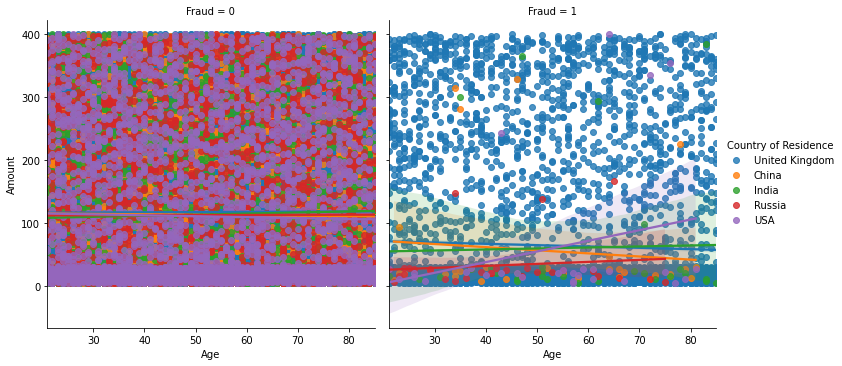

In [34]:
# Fraudlents based on Country of Residence
sns.lmplot(data=a,x='Age',y='Amount',col='Fraud',hue='Country of Residence')

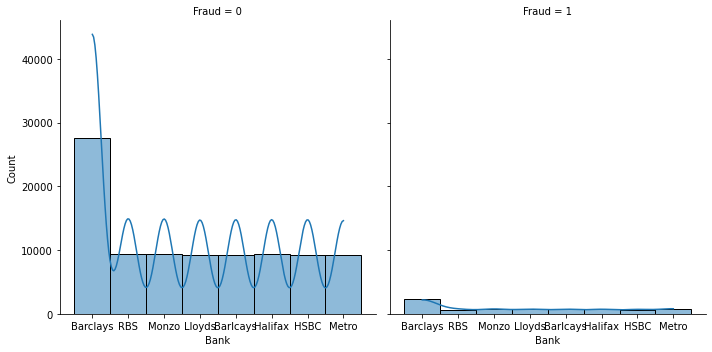

In [37]:
# Another view for Bank Fraud's based on Amount
sns.displot(data=a,x="Bank",col="Fraud",kde=True)

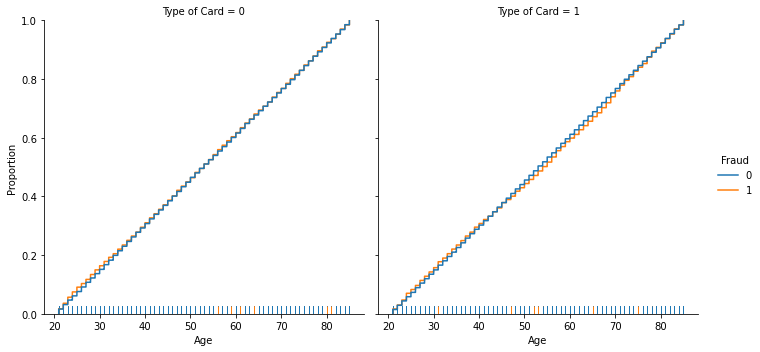

In [38]:
# Based on Type of Card Used for Transaction
sns.displot(data=a, kind="ecdf",x="Age",col="Type of Card",hue="Fraud",rug=True)